# Case 3: Fifa 2022 world cup

Let me use some information about countries from the 2022 Fifa World Cup. I have added som attributes for the countrues and the clubs with the help from ChatGpt (these attributes may not be accurate).

For the club: if the club was the national champion in its country the year before the world cup
For the country: if the country is considered developed or not.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from IPython.display import IFrame

IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjk__2p0MTF5Oh_qmJ9PQpk-QN71HXKzxIYBcvKe09YiGYDD9tL1FlZ7BIiAL2rx_4wdF8mOWziGl9/pubhtml', 800, 350)

In [3]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


In [4]:
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Pay attention! ... it is obvious we could have a bipartite network here.

Let's try this one with players and club:

In [5]:
import networkx as nx

fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [6]:
players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
clubs_nodes = set(fifanet1) - players_nodes

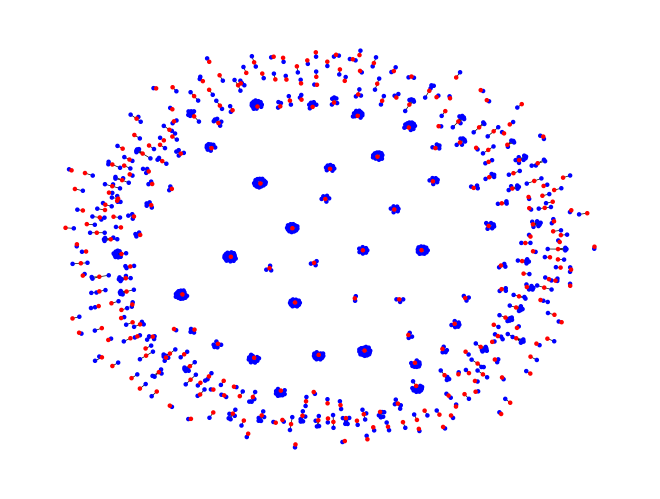

In [7]:
pos = nx.spring_layout(fifanet1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

As this one is not working, do you think "player-country" would work? Prepare it, and test your answer.

In [8]:
fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.nationality, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.nationality)])

In [9]:
players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
nat_nodes = set(fifanet1) - players_nodes

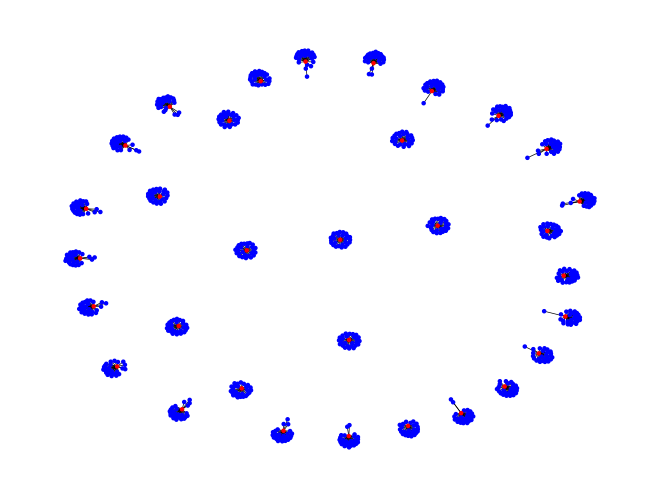

In [10]:
pos = nx.spring_layout(fifanet1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

Prepare the bipartite "club-country", and create two graphs, one where club is projected, and another where country is projected. What is the meaning of the edges in each case?

Save both projected graphs (weighted) as graphml. Include the attributes for the nodes that will be projected.

In [11]:
# Create the bipartite graph
fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.club, bipartite=0) # Add clubs with bipartite attribute 0
fifanet1.add_nodes_from(fifa.nationality, bipartite=1) # Add countries with bipartite attribute 1
fifanet1.add_edges_from([tuple(x) for x in fifa[['club', 'nationality']].values])

In [13]:
from networkx.algorithms import bipartite

In [14]:
# Project the bipartite graph onto clubs
clubs_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
club_projection = bipartite.projected_graph(fifanet1, clubs_nodes)

# Project the bipartite graph onto countries
countries_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 1}
country_projection = bipartite.projected_graph(fifanet1, countries_nodes)

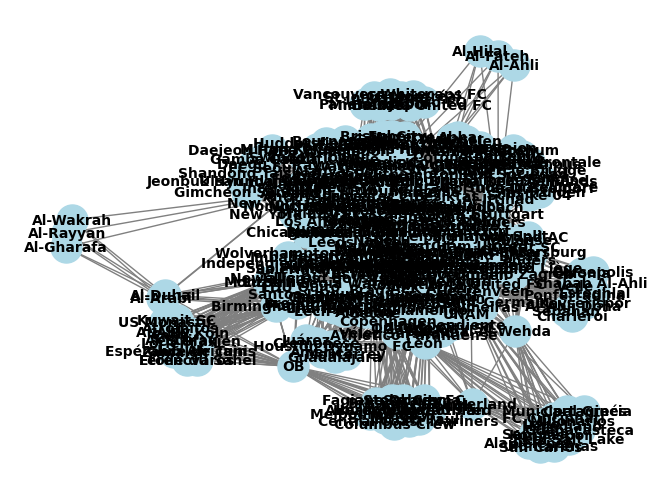

In [15]:
# Visualize the club projection
pos = nx.spring_layout(club_projection)
nx.draw(club_projection, pos=pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')


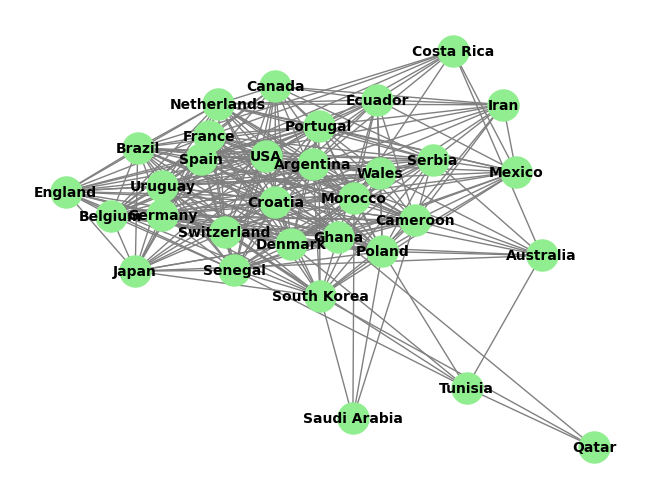

In [16]:
# Visualize the country projection
pos = nx.spring_layout(country_projection)
nx.draw(country_projection, pos=pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='gray')


What is the meaning of the edges in each case?
- An edge between two club nodes indicates that the two clubs have at least one player in common who represents the same country in the FIFA World Cup.
- An edge between two country nodes indicates that the two countries have at least one player in common who plays for the same club.

### Saving my graphs

In [17]:
myFolder = "MyGraphs/"
nx.write_graphml(club_projection, myFolder + "club_projection.graphml", named_key_ids=True)
nx.write_graphml(country_projection, myFolder + "country_projection.graphml",named_key_ids=True)